# 股市泡沫檢測器 - FinLab
這是一個泡沫檢測器，只要輸入[yahoo finance](https://finance.yahoo.com/)上找到的股票代號，即可查看該股票是否有泡沫，或是反泡沫。此程式碼使用 [lppls package](https://github.com/Boulder-Investment-Technologies/lppls) 讓我們非常方便的來使用 LPPL 這個數學工具。

In [1]:
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
import math

import yahoo_fin.stock_info as yf

In [2]:
asset_symbol = 'ETH-USD'
df = yf.get_data(asset_symbol)
close_price = df['close']

In [ ]:
df

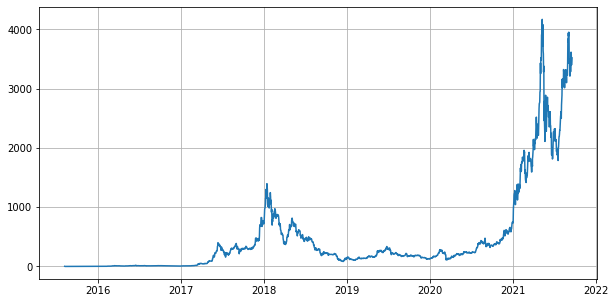

In [3]:
fig = plt.figure()
fig.set_size_inches(10, 5)
plt.plot(close_price, label=asset_symbol)
plt.grid()
plt.show()

( b < 0   )  -0.011492181504422022 True
(|c| < 1  )  -0.0060375349073616335 True
(0 < m < 1)  0.849242112359885 True
The trend fits the model


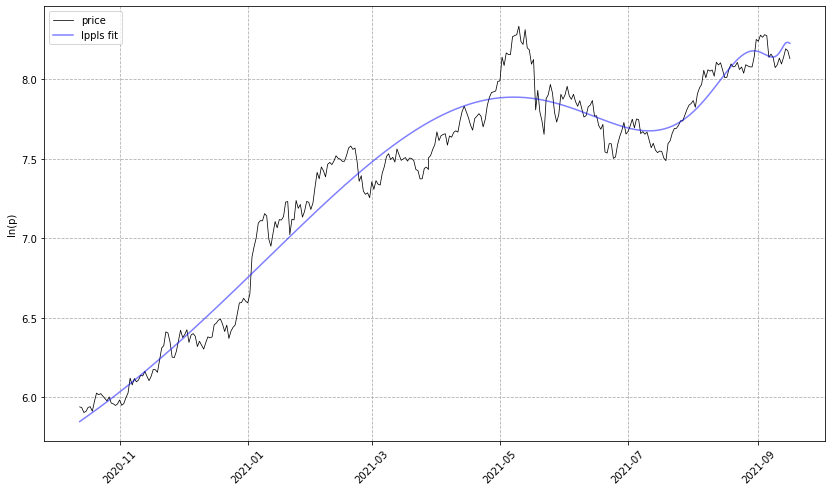

In [6]:
variable_name = "2021-09-16"
ndates = 339
processing_data = close_price[:variable_name].iloc[-ndates:].reset_index()
processing_data['index'] = processing_data['index'].astype(str)
processing_data

time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in processing_data['index']]

# create list of observation data
price = np.log(processing_data['close'])

# create observations array (expected format for LPPLS observations)
observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 5

# instantiate a new LPPLS model with the Nasdaq Dot-com bubble dataset
lppls_model = lppls.LPPLS(observations)

# fit the model to the data and get back the params
tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

print('( b < 0   ) ', b, b < 0)
print('(|c| < 1  ) ', c, abs(c)<1)
print('(0 < m < 1) ', m, 0 < m < 1)

if(b < 0 and abs(c)<1 and 0 < m < 1):
    print("The trend fits the model")
    # visualize the fit
    lppls_model.plot_fit()
else:
    print("The trend deosn't fit the model")

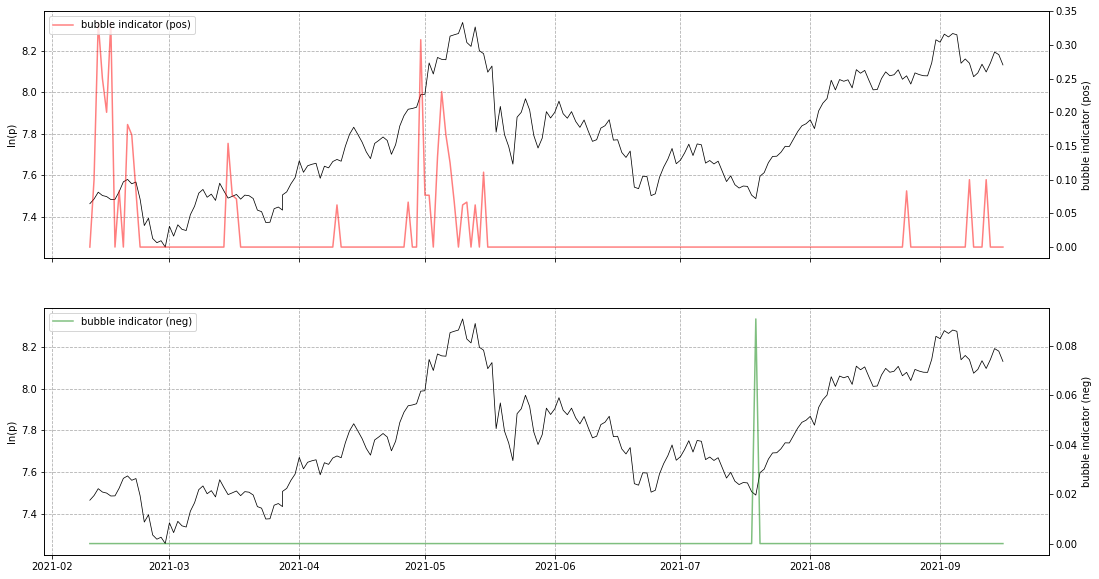

In [8]:
res = lppls_model.mp_compute_nested_fits(
    workers = 8,
    window_size = 120, 
    smallest_window_size = 30, 
    outer_increment = 1, 
    inner_increment = 5, 
    max_searches = 5,
#     filter_conditions_config={} # not implemented in 0.6.x
)

lppls_model.plot_confidence_indicators(res)